

# Project: Investigate a Dataset - TMDb Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I will be analysing a movie dataset to get some insights about the nature of movies stored on the database of TMDb movies to give insights that could be of help to streaming companies and movie production company execuitves.

### Dataset Description 

The data set I will be using contains information of about 10,000 movies collected from The Movie Database (TMDb). The dataset also includes specific movie attributes like its user ratings, popularity ratings, release year and revenue generated.


### Question(s) for Analysis

>What are the features of popular movies?

>Which genres are most popular from year to year?

To do the analysis, I will be using popular data analysis modules- pandas, numpy, matplotlib and seaborn-from the Python programming language in order to achieve computated statistcs and visulaizations. 

In [1]:
# Importing data analysis modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

**In this section I will start off by loading the dataset into this notebook to begin the assessment the intergrity of the information contained within it.** 

In [2]:
# Loading the dataset
df_mov = pd.read_csv('tmdb-movies.csv')


**First, let us understand the dimensions of the dataset's shape**

In [3]:
# Checking the dimensions of the dataset
df_mov.shape

(10866, 21)

**There are 10866 rows of movies and 21 columns of attributes.**

**To understand the nature of values in the 21 columns of attributes lets get the names of the columns in the dataset.**

In [4]:
#Display the names of the dataset columns
df_mov.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

**The following are the names of all the columns in the dataset**

'id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title','cast', 'homepage', 'director', 'tagline', 'keywords', 'overview','runtime', 'genres', 'production_companies', 'release_date','vote_count', 'vote_average', 'release_year', 'budget_adj','revenue_adj'


**We can also get a summary of the type of data stored in each column**

In [5]:
# Display a summary information for the datatypes of the columns.
df_mov.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

**Int64** data type indicates that the values in the column are numeric while **object** data type indicates that the values in the column are non-numeric.

**To understand the characteristics of the numeric columns lets look at the summary statistics of the dataset**

In [6]:
# Summary statistcs of the dataset
df_mov.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Looking at the summary statistics of the dataset, the budget and revenue columns have some unrealistic data. Their respective min, 25 percentile and 50 percentile do not represent any meaningful data and the count is unrealistic. I would need to check for the amount of zero values the respective columns.**

**Lets view the first five rows of the dataset to have a visual observation of the dataset.**

In [7]:
#Display the first rows of the dataset
df_mov.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**Visually observing the dataset, its is noticeable that certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. This pipe character will have to be removed later for easy analysis with the respective columns**

**Lets check if there are rows with null values in the dataset**

In [8]:
# Display a concise summary of the dataframe,
# including the number of non-null values in each column
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies columns all have rows with null values.**

**It is important to know the amount of null values in every column inorder to understand the integerity of the values in the column, so lets compute the summation of occurrence of null values.**

In [9]:
# Displays the number of null values in each columns in the dataset
df_mov.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**The amount of rows with null values in the homepage, tagline, keywords and production_companies columns are approximately 10% of their entire respective data and therefore will have to be deleted because of the high inconsistency.**


### Data Cleaning 

**To begin cleaning the dataset, I will make a copy of the dataset so the orignal dataset is unaffaected by the processing incase there is a need to grab some already deleted information.**

In [10]:
# creating a copy of the dataset
movie_db = df_mov.copy()

**I want to check for duplicate rows**

In [11]:
# display the number of duplicates in the dataset
movie_db.duplicated().sum()

1

__There is one duplicate row in the dataset and it needs to deleted__

In [12]:
# Deleting duplicate row from the data
movie_db.drop_duplicates(inplace=True)

In [13]:
# rechecking for duplicates in the data to confirm correction 
movie_db.duplicated().sum()

0

**Also I want to delete columns - homepage, tagline, keywords and production_companies - with high amounts of null values because that makes their information highly inconsistent**

In [14]:
# Deleting columns with high counts of null values
column_labels_to_drop = ['homepage','tagline','keywords', 'production_companies']
movie_db.drop(columns = column_labels_to_drop, inplace=True)

In [15]:
# Rechecking the dataset to see if the columns with null values have been deleted correctly.
movie_db.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'overview', 'runtime', 'genres', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

**I want to check if there are still columns with little amounts of null values**

In [16]:
# Checking if there are still columns with null values
movie_db.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

**The following columns with null values will not be removed entirely from the dataset because the amount it null values are not large enough to affect the integrity of the informations in their columns but the rows that contain the null will be removed to make the dataset cleaner**

In [17]:
# Deleting every row with null values to have a null value free dataset
movie_db.dropna(inplace=True)

In [18]:
# Rechecking the dataset to see if all rows with null values have been dropped 
movie_db.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

**There are no more null values in the dataset. Lets check the current dimension of the dataset**

In [19]:
# Checking the new shape of the dataset after deleting all null values
movie_db.shape

(10724, 17)

**So far the rows of movies in dataset have been reduced from the initial 10866 to 10724 and the attribute columns have been reduced for 21 to 17**

**Recall earlier looking at the summary statistics the budget and revenue columns had unrealistic values, now I have to check for the zero values in those columns to accertain how much of their rows contain values of zero**

**First I to want create a mask that will filter and flag `True` for rows in the budget column that have zero values.**

In [20]:
#Creating a mask dataframe to Boolean flag rows in the budget column 
#that have value of zero
mask = movie_db['budget'] == 0
print(mask)

0        False
1        False
2        False
3        False
4        False
         ...  
10861     True
10862     True
10863     True
10864     True
10865    False
Name: budget, Length: 10724, dtype: bool


**Next I wll store the mask in another dataframe so that I can check its  dimension and know the number of flagged rows**

In [21]:
# Storing the mask in a dataframe and checking its dimension
# and determine how many row are affected by the flag 
bud_df = movie_db[mask]
bud_df.shape

(5572, 17)

**There are 5572 rows in the budget column that have zero values of budget so I will delete the budget column from the dataset because its data is highly inconsistent.**

In [22]:
#Deleting the budget column from the dataset
movie_db.drop('budget', axis=1,inplace=True)

In [23]:
#Checking to verify that the budget column is deleted.
movie_db.columns

Index(['id', 'imdb_id', 'popularity', 'revenue', 'original_title', 'cast',
       'director', 'overview', 'runtime', 'genres', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

**Also I will delete all the rows in revenue column that have zero values using the same mask method I used for the budget column but this time to check if there are still rows in column with zero values after deleting**

In [24]:
# Deleting rows in the revenue column that value is equal to zero
movie_db = movie_db[movie_db.revenue != 0]

In [25]:
# Creating a mask to check if there is still any zero rows in revenue column
rev_mask = movie_db.revenue == 0

In [26]:
#Checking if there is stil any rows in revenue that is equal to zero
print(rev_mask.sum())

0


**There are no more rows in the revenue columns with zero value**

In [27]:
# Checking the current shape of the dataset after all rows 
# in the revenue column with zero values have been deleted 
movie_db.shape

(4843, 16)

**So far the rows of movies in dataset have been reduced from the initial 10866 to 4843 and the attribute columns have been reduced for 21 to 16**

**I have no need for the adjusted budget and adjust revenue columns for my analysis so I will delete both columns**

In [28]:
# Deleting the budget_adj and revenue_adj columns
movie_db = movie_db.drop(columns = ['budget_adj','revenue_adj'])

In [29]:
# Display current column names of the dataset
movie_db.columns

Index(['id', 'imdb_id', 'popularity', 'revenue', 'original_title', 'cast',
       'director', 'overview', 'runtime', 'genres', 'release_date',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

**Also, I have no need for the cast, overview, release_date, imdb_id columns in my analysis so I will delete the columns.**

In [30]:
# Deleting the above stated columns
movie_db.drop(columns=['cast','overview','release_date','imdb_id'], inplace=True)

In [31]:
movie_db.shape

(4843, 10)

**The final shape of the dataset after cleaning and deleting the irrelevant rows and columns is now 4843 rows of movies and 10 columns of attributes.**

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What are the features of popular movies?

**To do this analysis, I would need to plot multiple histograms of different features in the dataset to see the nature of their distribution. So I want to define a `hist_plot`function that I will use to plot the various distributions.** 

In [32]:
def hist_plot(col_name,x_axis,title, y_axis='number of movies',legend='number of movies'):
    plt.hist(movie_db[col_name], label=legend)
    plt.legend()
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    plt.grid(True)

**To start the analysis I want to check the distribution of the popularity rating in the dataset**

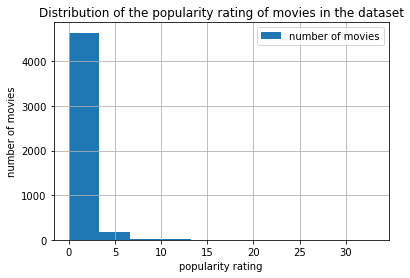

In [33]:
# Plotting histogram to check popularity distribution
hist_plot('popularity','popularity rating','Distribution of the popularity rating of movies in the dataset')

**From the histogram its is observed that popularity is skewed**

**I want to also check the summary statistics to understand the nature of the numeric values in the popularity column.**

In [34]:
movie_db.popularity.describe()

count    4843.000000
mean        1.046315
std         1.357222
min         0.001117
25%         0.388227
50%         0.680803
75%         1.210533
max        32.985763
Name: popularity, dtype: float64

**From summary statistics it can be observed that movies with rating above 1 may be considered as popular given that the mean is 1 and the maximum value is 32.98.** 

## Histograms for Various Features

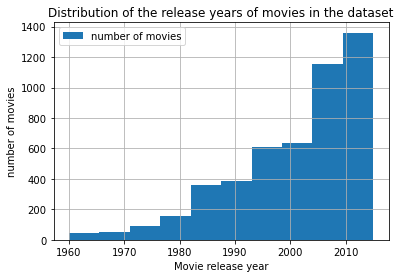

In [35]:
hist_plot(col_name='release_year',x_axis='Movie release year',title='Distribution of the release years of movies in the dataset')

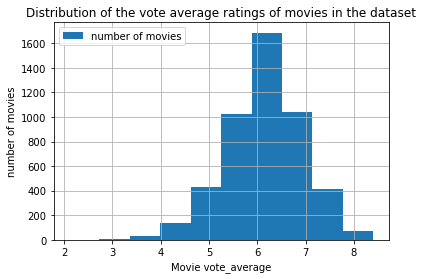

In [36]:
hist_plot(col_name='vote_average',x_axis='Movie vote_average',title='Distribution of the vote average ratings of movies in the dataset')

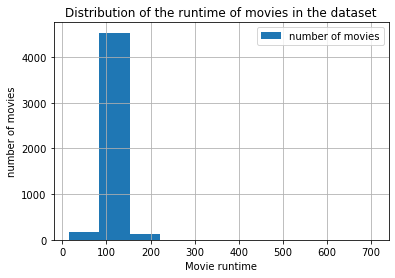

In [37]:
hist_plot(col_name='runtime',x_axis='Movie runtime',title='Distribution of the runtime of movies in the dataset')

**Based on the histograms it can be observed that distribution of release year and vote_average are skewed but the distribution of the runtime is symetrical.**

## Scatterplots of movie popularity Against Various Features 

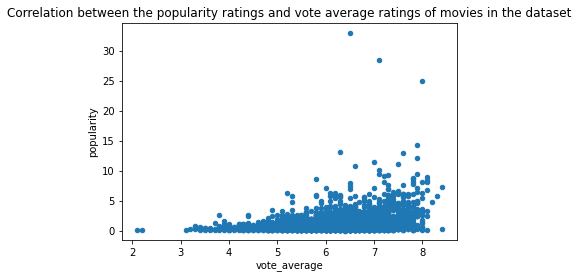

In [38]:
# popularity against vote average scatter plot
movie_db.plot(x='vote_average', y='popularity',kind ='scatter',title='Correlation between the popularity ratings and vote average ratings of movies in the dataset');

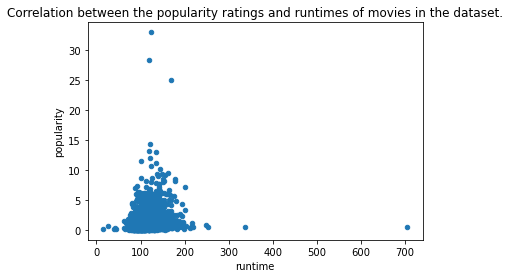

In [39]:
# popularity against runtime scatter plot
movie_db.plot(x='runtime', y='popularity', kind = 'scatter',title='Correlation between the popularity ratings and runtimes of movies in the dataset.');

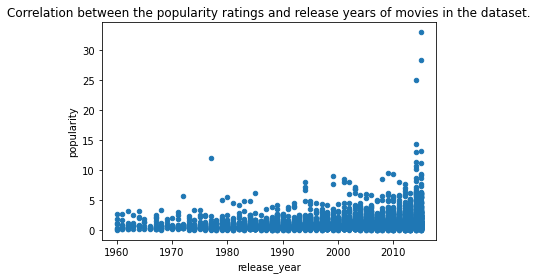

In [40]:
# popularity against release year scatter plot
movie_db.plot(x='release_year', y = 'popularity', kind='scatter', title='Correlation between the popularity ratings and release years of movies in the dataset.');

**Based on the scatterplots of popularity against different feature variables runtime has the strongest correlation to popularity.**

### Research Question 2:  Which genres are most popular from year to year?

During the cleaning of the dataset it was observed that rows in genres column had more than 1 genre and the genres were grouped together. Lets take a look again

In [41]:
movie_db.head()

,id,popularity,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


We can also notice that the rows in the genre column have more than 1 genre grouped together. For instance the Furious 7 has 3 genres which are action,crime and thriller and these genres are separated by pipe (|) characters.

So I need to consider all the genre to find out the most popular genres because if I choose just one genre for each movie the analysis would be inconsistent and biased.

Therefore I need to split the grouped genre to have their individual columnms for the movies attached.

In [42]:
#Creating a dataframe to store the unique mixed values of genres 
# for each much movie in the dataset
mixed_genre = movie_db['genres'].unique()

In [43]:
#Initializing an empty list to store unique genre 
unique_genre = []

In [44]:
for genre in mixed_genre:
    for i in genre.split('|'):
        pg = i.lower()
        if pg not in unique_genre:
            unique_genre.append(pg)

In [45]:
# Use the below command to add the columns for all genres in your dataframe..
new_columns = pd.DataFrame(columns = unique_genre)

In [46]:
genre_db = pd.concat([movie_db,new_columns], sort= False)

In [47]:
# Then to flag your genre columns use the below for loop..
for i in unique_genre:
    genre_db[i] = genre_db['genres'].apply(lambda x: 1 if i.lower() in x.lower() else 0)

In [48]:
genre_db.head()

,id,popularity,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,...,comedy,mystery,romance,war,history,music,horror,documentary,foreign,tv movie
0,135397.0,32.985763,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,5562.0,6.5,2015.0,...,0,0,0,0,0,0,0,0,0,0
1,76341.0,28.419936,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,6185.0,7.1,2015.0,...,0,0,0,0,0,0,0,0,0,0
2,262500.0,13.112507,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2480.0,6.3,2015.0,...,0,0,0,0,0,0,0,0,0,0
3,140607.0,11.173104,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,5292.0,7.5,2015.0,...,0,0,0,0,0,0,0,0,0,0
4,168259.0,9.335014,1.506249e+09,Furious 7,James Wan,137.0,Action|Crime|Thriller,2947.0,7.3,2015.0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
yeartogenre = genre_db.loc[:,'release_year':'tv movie']

In [50]:
yeartogenre.head()

,release_year,action,adventure,science fiction,thriller,fantasy,crime,western,drama,family,...,comedy,mystery,romance,war,history,music,horror,documentary,foreign,tv movie
0,2015.0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015.0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015.0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015.0,1,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015.0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
yeartogenre.columns

Index(['release_year', 'action', 'adventure', 'science fiction', 'thriller',
       'fantasy', 'crime', 'western', 'drama', 'family', 'animation', 'comedy',
       'mystery', 'romance', 'war', 'history', 'music', 'horror',
       'documentary', 'foreign', 'tv movie'],
      dtype='object')

In [52]:
genre_plot = yeartogenre.groupby('release_year', as_index=False)['action', 'adventure', 'science fiction', 'thriller',
       'fantasy', 'crime', 'western', 'drama', 'family', 'animation', 'comedy',
       'mystery', 'romance', 'war', 'history', 'music', 'horror',
       'documentary', 'foreign', 'tv movie'].sum()

In [53]:
genre_plot.head()

,release_year,action,adventure,science fiction,thriller,fantasy,crime,western,drama,family,...,comedy,mystery,romance,war,history,music,horror,documentary,foreign,tv movie
0,1960.0,2,1,0,1,0,0,1,4,1,...,4,0,3,0,1,0,1,0,0,0
1,1961.0,2,2,0,0,0,1,1,6,2,...,4,0,1,1,1,1,1,0,0,0
2,1962.0,2,3,0,1,0,1,2,6,1,...,1,1,0,1,1,1,1,0,0,0
3,1963.0,2,2,0,3,0,1,0,3,0,...,2,1,2,1,3,0,1,0,0,0
4,1964.0,1,1,0,2,1,2,0,4,2,...,4,1,2,1,0,3,0,0,0,0


In [54]:
genre_plot.shape

(56, 21)

**I want to define a `plot_chart` function to plot the chart that will show the total number of movies released under each genres for each release years.**

In [55]:
# This function is used to plot chart 
def plot_chart(x_axis_name,*y_axis_name):
    for axis in y_axis_name:
        plt.plot(genre_plot[x_axis_name], genre_plot[axis], '-o', label = axis)

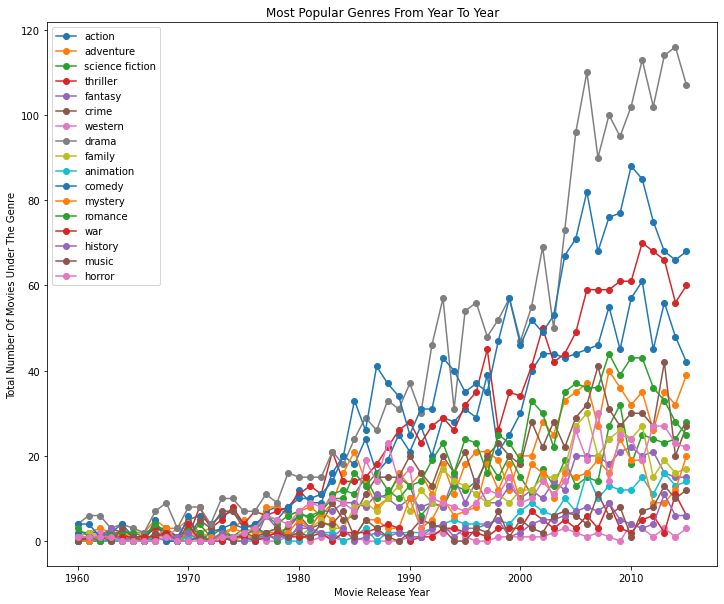

In [56]:
fig = plt.figure(figsize=(12,10))
plot_chart('release_year','action','adventure','science fiction','thriller','fantasy','crime','western','drama','family','animation','comedy','mystery','romance','war','history','music','horror')
leg = plt.legend()
plt.xlabel('Movie Release Year')
plt.ylabel('Total Number Of Movies Under The Genre')
plt.title('Most Popular Genres From Year To Year')
plt.show()

<a id='conclusions'></a>
## Conclusions

> Over the years the family genre has maintained a steady growth. From the chart we can observe that the Drama genre held the top spot as the genre with the most numbers of movies from the 1960's to the 1980's and only dropped briefly to second place in the early 1990's where the Action genre had an uptick in numbers of movies but it then regained the top spot in the late 1990's and ever since has experienced exponetial growth. The Horror genre is the least popular genre from year to year.

> The lack of sufficient data in the budget hindered my conclusion on the features of popular movies. 
